<a href="https://colab.research.google.com/github/aligator4sah/kaggle-ai-report/blob/main/Kaggle_AI_Report_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview for write_up dataset

In [1]:
import pandas as pd
import csv

with open("/content/kaggle_writeups_20230510.csv") as file:
  csv_reader = csv.reader(file)

write_ups1 = pd.read_csv('/content/kaggle_writeups_20230510.csv', on_bad_lines='skip', engine='python')
write_ups1.head()

,Competition Launch Date,Title of Competition,Competition URL,Date of Writeup,Title of Writeup,Writeup,Writeup URL
0,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/18/2010 00:06:46,Released: my Source Code and Analysis,<p>I had a lot of fun with this competition an...,https://www.kaggle.com/c/2447/discussion/185
1,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/20/2010 04:38:53,6th place(UriB) by Uri Blass,<P>I calculated rating for every player in mon...,https://www.kaggle.com/c/2447/discussion/192
2,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/23/2010 10:38:23,7th place - littlefish,I'm a little surprised I ended up in the top-1...,https://www.kaggle.com/c/2447/discussion/194
3,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/20/2010 11:27:17,3rd place: Chessmetrics - Variant,"<p><span id=""post_text_content_1230""><div dir=...",https://www.kaggle.com/c/2447/discussion/193
4,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/18/2010 02:44:10,2nd place: TrueSkill Through Time,"Wow, this is a surprise! I looked at this comp...",https://www.kaggle.com/c/2447/discussion/186


In [2]:
write_ups1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Competition Launch Date  955 non-null    object
 1   Title of Competition     955 non-null    object
 2   Competition URL          955 non-null    object
 3   Date of Writeup          955 non-null    object
 4   Title of Writeup         955 non-null    object
 5   Writeup                  953 non-null    object
 6   Writeup URL              955 non-null    object
dtypes: object(7)
memory usage: 52.4+ KB


In [3]:
write_ups1['Title of Competition'].nunique()

173

In [ ]:
write_ups1.loc[164].Writeup

'<p>I got a lot of requests during the competition for a benchmark script. So, as promised, here it is.... After all, its all about learning :D</p>\n\n<p>The script will easily give you 0.80+ in  Public LB. In Private LB, you can easily get a top 10% rank using this script. With some modifications, this script gives top 30 rank out of 2200+ competitors.... not bad ha?! ;)</p>'

In [4]:
language_comps = write_ups1[(write_ups1.Writeup.str.contains(
    'language', 'text') | write_ups1['Title of Competition'].str.contains(
    'language')).fillna(False)]['Title of Competition'].unique()
print(f"How many now: {len(language_comps)}")
language_comps

How many now: 18


array(['Chess ratings - Elo versus the Rest of the World',
       "dunnhumby's Shopper Challenge",
       'StumbleUpon Evergreen Classification Challenge',
       'Microsoft Malware Classification Challenge (BIG 2015)',
       'Flavours of Physics: Finding τ  →  μμμ',
       'TalkingData Mobile User Demographics',
       'Bosch Production Line Performance',
       'Text Normalization Challenge - Russian Language',
       'Cdiscount’s Image Classification Challenge',
       "WSDM - KKBox's Music Recommendation Challenge",
       'Santa Gift Matching Challenge',
       'Toxic Comment Classification Challenge',
       'TalkingData AdTracking Fraud Detection Challenge',
       'Avito Demand Prediction Challenge',
       'Google Analytics Customer Revenue Prediction',
       'Microsoft Malware Prediction', 'PetFinder.my Adoption Prediction',
       'Gendered Pronoun Resolution'], dtype=object)

In [7]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 73.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

Overview for metadata dataset

In [8]:
from dataprep.clean import clean_headers
clean_headers(write_ups1)

Column Headers Cleaning Report:
	7 values cleaned (100.0%)


,competition_launch_date,title_of_competition,competition_url,date_of_writeup,title_of_writeup,writeup,writeup_url
0,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/18/2010 00:06:46,Released: my Source Code and Analysis,<p>I had a lot of fun with this competition an...,https://www.kaggle.com/c/2447/discussion/185
1,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/20/2010 04:38:53,6th place(UriB) by Uri Blass,<P>I calculated rating for every player in mon...,https://www.kaggle.com/c/2447/discussion/192
2,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/23/2010 10:38:23,7th place - littlefish,I'm a little surprised I ended up in the top-1...,https://www.kaggle.com/c/2447/discussion/194
3,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/20/2010 11:27:17,3rd place: Chessmetrics - Variant,"<p><span id=""post_text_content_1230""><div dir=...",https://www.kaggle.com/c/2447/discussion/193
4,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/18/2010 02:44:10,2nd place: TrueSkill Through Time,"Wow, this is a surprise! I looked at this comp...",https://www.kaggle.com/c/2447/discussion/186
...,...,...,...,...,...,...,...
950,03/28/2019 15:05:58,iMet Collection 2019 - FGVC6,https://www.kaggle.com/c/13251,06/11/2019 07:57:56,6th place simple solution with code,<p>Congratulations to all the teams got the me...,https://www.kaggle.com/c/13251/discussion/95282
951,03/28/2019 15:05:58,iMet Collection 2019 - FGVC6,https://www.kaggle.com/c/13251,06/06/2019 08:22:16,Solution | Private Top 1,<p>Congrats to all who finished in the gold zo...,https://www.kaggle.com/c/13251/discussion/94687
952,03/28/2019 15:05:58,iMet Collection 2019 - FGVC6,https://www.kaggle.com/c/13251,06/07/2019 05:42:41,Solution | Private 4th,<p>Congrats to all the winners.\nThanks to Kag...,https://www.kaggle.com/c/13251/discussion/94817
953,03/28/2019 15:05:58,iMet Collection 2019 - FGVC6,https://www.kaggle.com/c/13251,06/06/2019 22:16:35,0.669 Public LB Solution,"<p>First of all, I would like to thank the org...",https://www.kaggle.com/c/13251/discussion/94790


In [9]:
df=clean_headers(write_ups1)

Column Headers Cleaning Report:
	7 values cleaned (100.0%)


In [10]:
df["title_of_competition"].value_counts()

Santander Customer Transaction Prediction        32
LANL Earthquake Prediction                       29
TGS Salt Identification Challenge                26
Avito Demand Prediction Challenge                22
Quora Insincere Questions Classification         22
                                                 ..
AMS 2013-2014 Solar Energy Prediction Contest     1
WSDM - KKBox's Churn Prediction Challenge         1
Cause-effect pairs                                1
Liberty Mutual Group - Fire Peril Loss Cost       1
MLSP 2013 Bird Classification Challenge           1
Name: title_of_competition, Length: 173, dtype: int64

Text Analysis and Visualization based on LANL Earthquake Prediction

In [25]:
riid = df[(df['title_of_competition']=="LANL Earthquake Prediction")].reset_index(drop=True)
nRow, nCol = riid.shape
print(f'There are {nRow} rows and {nCol} columns')
riid.tail()

There are 29 rows and 7 columns


,competition_launch_date,title_of_competition,competition_url,date_of_writeup,title_of_writeup,writeup,writeup_url
24,01/10/2019 22:39:46,LANL Earthquake Prediction,https://www.kaggle.com/c/11000,06/04/2019 08:50:58,1st place solution,<p>Thanks a lot to the hosts of this competiti...,https://www.kaggle.com/c/11000/discussion/94390
25,01/10/2019 22:39:46,LANL Earthquake Prediction,https://www.kaggle.com/c/11000,06/04/2019 20:19:22,5th place solution,<p>Hello kaggers!</p>\n\n<p>There have been ma...,https://www.kaggle.com/c/11000/discussion/94484
26,01/10/2019 22:39:46,LANL Earthquake Prediction,https://www.kaggle.com/c/11000,06/07/2019 22:53:50,22nd place solution described (molaee),<p>Its my pleasure to share the ad-hoc method ...,https://www.kaggle.com/c/11000/discussion/94903
27,01/10/2019 22:39:46,LANL Earthquake Prediction,https://www.kaggle.com/c/11000,06/04/2019 09:14:39,Unconventional gold (16th place solution),"<p>To begin with, I want to congratulate all c...",https://www.kaggle.com/c/11000/discussion/94396
28,01/10/2019 22:39:46,LANL Earthquake Prediction,https://www.kaggle.com/c/11000,06/04/2019 13:51:54,#6 Solution,<p>The main thing I took from my previous 2 co...,https://www.kaggle.com/c/11000/discussion/94433


In [30]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [34]:
text = " ".join(titl for titl in riid.title_of_writeup)

stopwords = set(STOPWORDS)
stop_list = ['solution', 'place']
stopwords = stopwords.update(stop_list)

print(text)


Our 35th place model ... (didn't submit) That One Sure Solution My no-test-leak 23rd solution #194 solution 179th place / top 5% (not submitted) solution - first competition My one trick for feature selection/data augmentation (183rd place) Congrats, and my 5 min lottery tickets (81th place/silver medal) 10th place solution (Amjad's view) 2nd place solution One Feature, No ML, Gold Medal Range 8th solution. XGBoost and Dataset balancing 19th place solution (GBDT + post-processing) 11th place solution Some elements of 7th place Solution fast.ai, a viable time series solution Virtual LB 130th: Mel spectrogram feature + class balance simple solution 15th Place Memo and CV Scheme Short summary for our approach (public 5th -> private 212th) 24th place single model (didn't submit) 87th place private and 1st place public solution 27th place Solution 12th place solution 3rd place memo 9th place solution 1st place solution 5th place solution 22nd place solution described (molaee) Unconventional

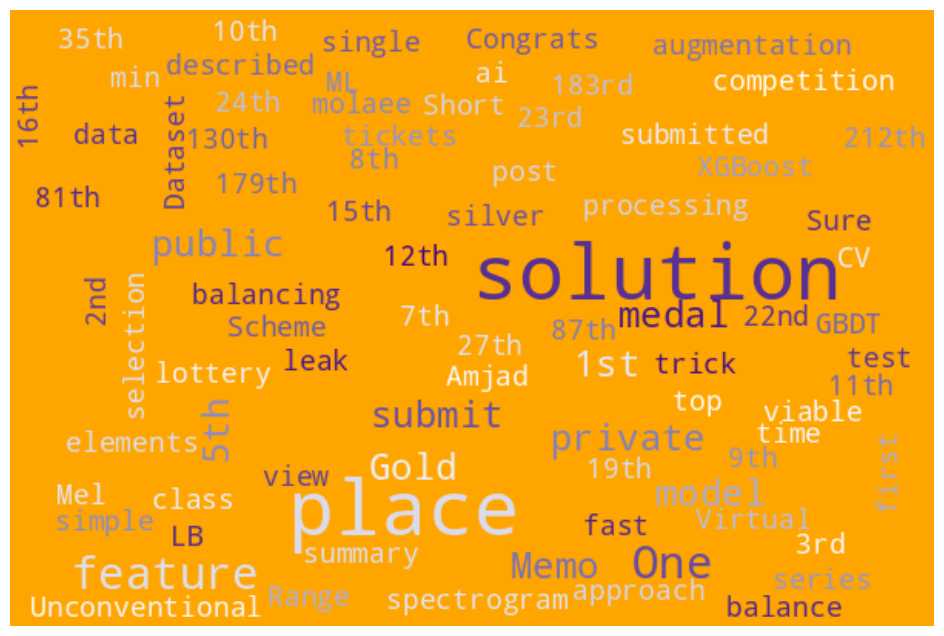

In [35]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      colormap='Purples',
                      background_color="orange").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()